In [6]:
%pip install wheel

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install tensorflow matplotlib tensorflow-datasets ipywidgets

  Using cached tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.6 kB)
  Using cached matplotlib-3.8.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached tensorflow_datasets-4.9.4-py3-none-any.whl.metadata (9.2 kB)
  Using cached ipywidgets-8.1.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.2 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached libclang-16.0.6-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached numpy-1.26.2-cp311-c

In [8]:
%pip install tensorflow-metal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.3 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [11]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [13]:
ds = tfds.load('stl10', split='train', shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5000 [00:00<?, ? examples/s]

Shuffling /Users/ishaandey/tensorflow_datasets/stl10/1.0.0.incompleteU9JX3J/stl10-train.tfrecord*...:   0%|   …

Generating test examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /Users/ishaandey/tensorflow_datasets/stl10/1.0.0.incompleteU9JX3J/stl10-test.tfrecord*...:   0%|    …

Generating unlabelled examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /Users/ishaandey/tensorflow_datasets/stl10/1.0.0.incompleteU9JX3J/stl10-unlabelled.tfrecord*...:   0…

Dataset stl10 downloaded and prepared to /Users/ishaandey/tensorflow_datasets/stl10/1.0.0. Subsequent calls will reuse this data.


In [14]:
ds.as_numpy_iterator().next()

{'image': array([[[136, 144, 153],
         [125, 127, 136],
         [125, 126, 130],
         ...,
         [ 98,  99,  98],
         [ 91,  95,  97],
         [ 84,  93,  99]],
 
        [[138, 134, 135],
         [116, 109,  99],
         [111, 107,  98],
         ...,
         [118, 121, 119],
         [118, 124, 126],
         [ 97, 105, 110]],
 
        [[129, 129, 122],
         [111, 109,  99],
         [127, 125, 120],
         ...,
         [113, 117, 114],
         [122, 126, 127],
         [116, 121, 124]],
 
        ...,
 
        [[132, 131, 120],
         [129, 126, 119],
         [121, 116, 110],
         ...,
         [215, 184, 163],
         [192, 148, 129],
         [198, 175, 157]],
 
        [[144, 142, 131],
         [127, 124, 113],
         [123, 118, 108],
         ...,
         [196, 155, 133],
         [200, 170, 162],
         [149, 111,  98]],
 
        [[164, 163, 157],
         [148, 147, 147],
         [159, 161, 161],
         ...,
         [212, 173,

In [15]:
import numpy as np

In [16]:
dataiterator = ds.as_numpy_iterator()

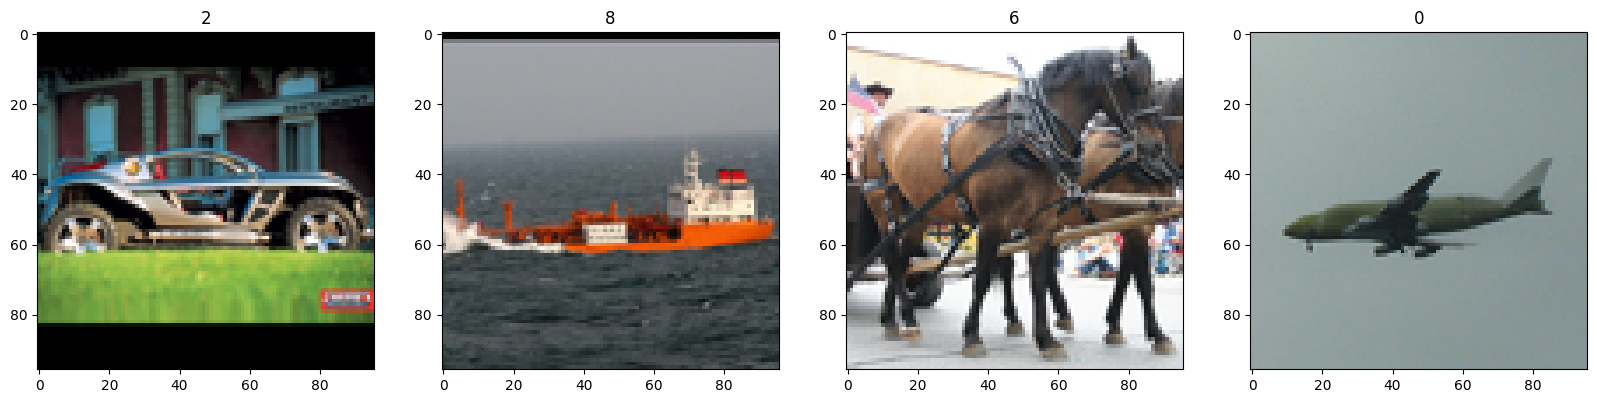

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(20, 20))

for i in range(4):
    sample = dataiterator.next()   
    ax[i].imshow(sample['image'])
    ax[i].set_title(sample['label'])
  

In [ ]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.0
    return image, label